In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

items = pd.read_csv('items.csv')
users = pd.read_csv('users.csv')

In [3]:
train.head()

,user_id,item_id,last_watch_dt,total_dur,watched_pct,target
0,310745,13373,2021-03-13,4485,98.0,1
1,952323,15997,2021-03-13,7507,100.0,1
2,889459,11460,2021-03-13,60,0.0,0
3,854016,11237,2021-03-13,5381,98.0,1
4,307257,9132,2021-03-13,5814,100.0,1


In [4]:
users.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [5]:
items.head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."


In [6]:
train.isna().mean(), test.isna().mean(), items.isna().mean(), users.isna().mean()

(user_id          0.0
 item_id          0.0
 last_watch_dt    0.0
 total_dur        0.0
 watched_pct      0.0
 target           0.0
 dtype: float64,
 user_id          0.0
 item_id          0.0
 last_watch_dt    0.0
 total_dur        0.0
 watched_pct      0.0
 target           0.0
 dtype: float64,
 item_id         0.000000
 content_type    0.000000
 title           0.000000
 title_orig      0.297250
 release_year    0.006139
 genres          0.000000
 countries       0.002318
 for_kids        0.964543
 age_rating      0.000125
 studios         0.933283
 directors       0.094531
 actors          0.164067
 description     0.000125
 keywords        0.026499
 dtype: float64,
 user_id     0.000000
 age         0.016776
 income      0.017586
 sex         0.016462
 kids_flg    0.000000
 dtype: float64)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152],
 [Text(0, 0, '2021-03-13'),
  Text(1, 

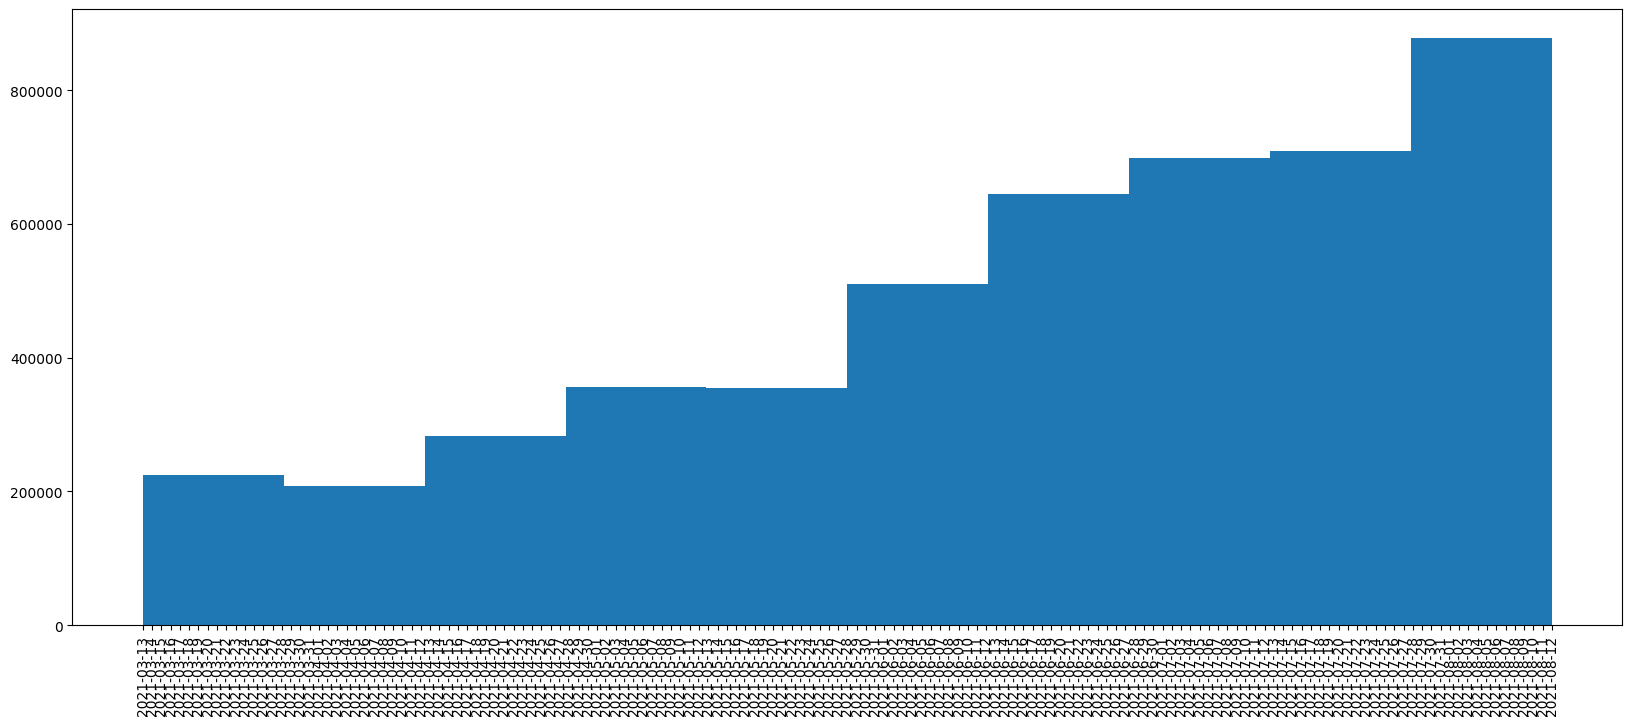

In [8]:
plt.figure(figsize=(20, 8),)
plt.hist(train['last_watch_dt'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2021-08-13'),
  Text(1, 0, '2021-08-14'),
  Text(2, 0, '2021-08-15'),
  Text(3, 0, '2021-08-16'),
  Text(4, 0, '2021-08-17'),
  Text(5, 0, '2021-08-18'),
  Text(6, 0, '2021-08-19'),
  Text(7, 0, '2021-08-20'),
  Text(8, 0, '2021-08-21'),
  Text(9, 0, '2021-08-22')])

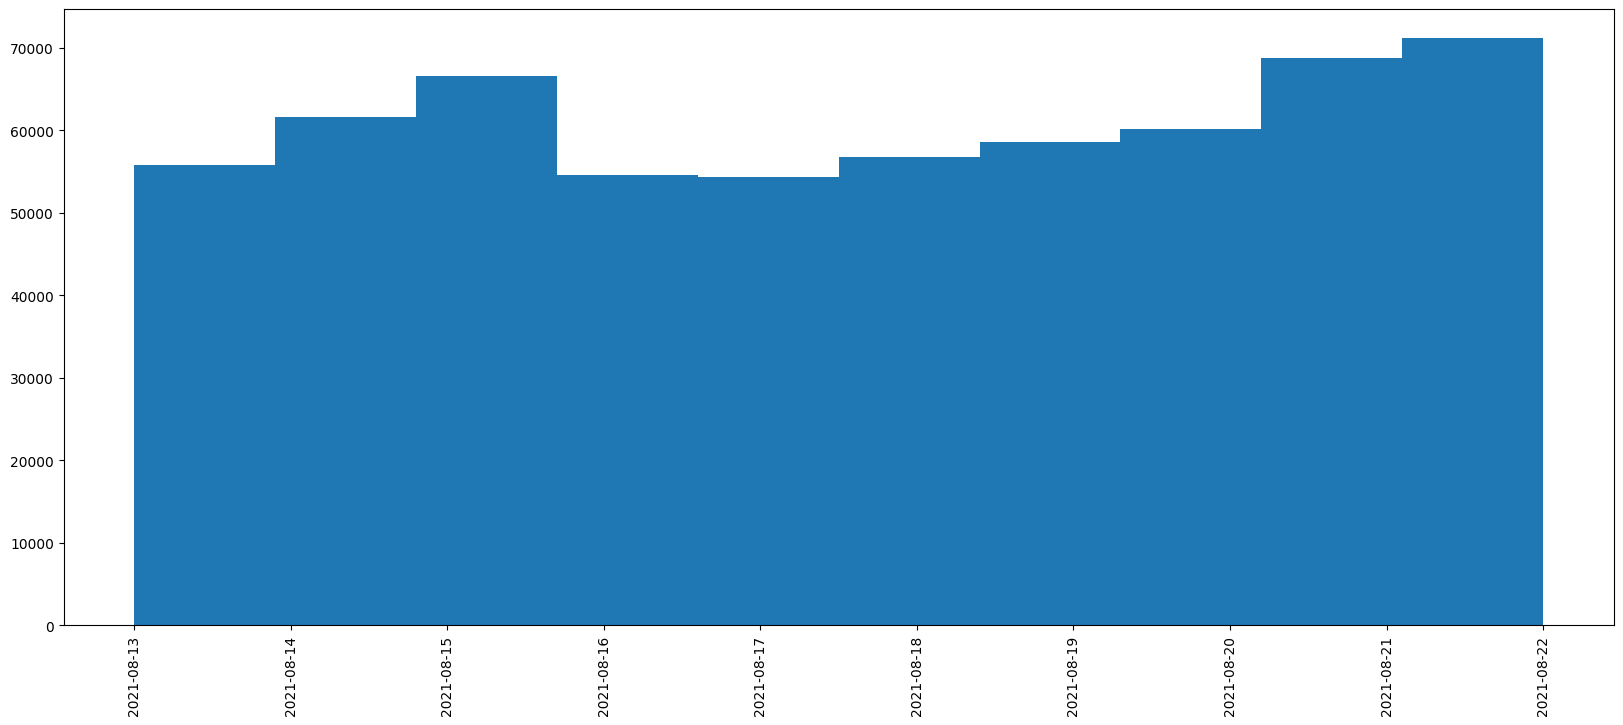

In [9]:
plt.figure(figsize=(20, 8),)
plt.hist(test['last_watch_dt'])
plt.xticks(rotation=90)

In [10]:
test = test[test['last_watch_dt'] == '2021-08-13']

In [16]:
train['last_watch_dt'] = pd.to_datetime(train['last_watch_dt'])
test['last_watch_dt'] = pd.to_datetime(test['last_watch_dt'])

In [17]:
train['weekday'] = pd.to_datetime(train.last_watch_dt).dt.weekday

In [18]:
train_stage_1 = train[(train['last_watch_dt'] >= '2021-08-05') & (train['last_watch_dt'] < '2021-08-12')]
valid_stage_1 = train[(train['last_watch_dt'] == '2021-08-12')]

In [19]:
train_stage_1.shape, valid_stage_1.shape#, test_stage_1.shape

((387684, 7), (56497, 7))

In [34]:
class TopPop():
    def __init__(self, train_df, window_size = 3):
        self.top_items = train_df[train_df['last_watch_dt'] == (train_df['last_watch_dt'].max() - pd.Timedelta(days=window_size))]['item_id'].value_counts().index.tolist()[:100]
        self.item_set = set(self.top_items)

    def predict_score(self, user_id, item_id):
        return 1.0 if item_id in self.item_set else 0.0

    def recommend(self, user_id, k=10):
        return self.top_items[:k]

In [35]:
toppop = TopPop(train_stage_1)

In [36]:
train_stage_1.sample(1)

,user_id,item_id,last_watch_dt,total_dur,watched_pct,target,weekday
4459837,106569,9728,2021-08-05,4039,59.0,1,3


In [37]:
toppop.recommend(9562)

[10440, 15297, 9728, 12192, 13865, 7793, 3734, 4151, 11863, 512]

In [38]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import coo_matrix

class iALS:
    def __init__(self, factors=64, regularization=0.01, iterations=20, alpha=40, default_score=0.0):
        self.model = AlternatingLeastSquares(
            factors=factors,
            regularization=regularization,
            iterations=iterations
        )
        self.alpha = alpha
        self.default_score = float(default_score)

        self.user_id_invmap = {}
        self.item_id_invmap = {}

        self.user_id_map = {}
        self.item_id_map = {}

        self.user_items_matrix = None

    def fit(self, df):
        user_ids = df["user_id"].astype("category")
        item_ids = df["item_id"].astype("category")

        self.user_id_invmap = dict(zip(user_ids.cat.categories, range(len(user_ids.cat.categories))))
        self.item_id_invmap = dict(zip(item_ids.cat.categories, range(len(item_ids.cat.categories))))
        self.user_id_map = {inner: raw for raw, inner in self.user_id_invmap.items()}
        self.item_id_map = {inner: raw for raw, inner in self.item_id_invmap.items()}

        rows = user_ids.cat.codes
        cols = item_ids.cat.codes
        values = df["target"].astype(float).values * self.alpha

        self.user_items_matrix = coo_matrix((values, (rows, cols))).tocsr()

        self.model.fit(self.user_items_matrix)

    def predict(self, user_id, item_id):
        if self.model.user_factors is None or self.model.item_factors is None:
            return self.default_score

        u = self.user_id_invmap.get(user_id)
        i = self.item_id_invmap.get(item_id)
        if u is None or i is None:
            return self.default_score

        return float(self.model.user_factors[u].dot(self.model.item_factors[i]))

    def recommend(self, user_id, k=10, filter_already_liked_items=False):
        if self.user_items_matrix is None:
            return []

        u = self.user_id_invmap.get(user_id)
        if u is None:
            return []

        inner_items, _ = self.model.recommend(
            userid=u,
            user_items=self.user_items_matrix,
            N=k,
            filter_already_liked_items=filter_already_liked_items,
        )
        return [self.item_id_map[i] for i in inner_items]

    def recommend_all(self, k=10, filter_already_liked_items=False):
        if self.user_items_matrix is None:
            return {}

        res = {}
        n_users = self.user_items_matrix.shape[0]
        for u in range(n_users):
            inner_items, _ = self.model.recommend(
                userid=u,
                user_items=self.user_items_matrix,
                N=k,
                filter_already_liked_items=filter_already_liked_items,
            )
            raw_user = self.user_id_map[u]
            res[raw_user] = [self.item_id_map[i] for i in inner_items]
        return res


In [39]:
ials = iALS()
ials.fit(train_stage_1)

/Users/danilhisamutdinov/clown_zxc/lib/python3.9/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 10 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

In [48]:
ials.recommend(1488)

[2337, 10884, 5434, 11778, 13021, 9617, 1000, 1445, 7417, 15333]

In [49]:
from collections import defaultdict

In [50]:
from tqdm.notebook import tqdm

In [51]:
def evaluate_ranking_model(model, test_df, k=10):
    gt = test_df[test_df['target'] == 1].groupby('user_id')['item_id'].apply(set).to_dict()
    all_users = gt.keys()

    metrics = defaultdict(list)

    for user_id in tqdm(all_users):
        true_items = gt.get(user_id, set())
        if not true_items:
            continue

        pred_items = model.recommend(user_id, k=k)

        hit = any(item in true_items for item in pred_items)
        metrics['HR@K'].append(int(hit))

        precision = sum(1 for item in pred_items if item in true_items) / k
        metrics['Precision@K'].append(precision)

        recall = sum(1 for item in pred_items if item in true_items) / len(true_items)
        metrics['Recall@K'].append(recall)

        dcg = 0.0
        for idx, item in enumerate(pred_items):
            if item in true_items:
                dcg += 1 / np.log2(idx + 2)
        idcg = sum(1 / np.log2(i + 2) for i in range(min(len(true_items), k)))
        ndcg = dcg / idcg if idcg > 0 else 0
        metrics['NDCG@K'].append(ndcg)

    print(f"Evaluated on {len(all_users)} users")
    return {m: np.mean(v) for m, v in metrics.items()}

In [52]:
evaluate_ranking_model(toppop, valid_stage_1[valid_stage_1['target'] == 1])

  0%|          | 0/15197 [00:00<?, ?it/s]

Evaluated on 15197 users


{'HR@K': 0.24274527867342238,
 'Precision@K': 0.024998354938474698,
 'Recall@K': 0.2251398302296506,
 'NDCG@K': 0.13431733376195498}

In [53]:
evaluate_ranking_model(ials, valid_stage_1[valid_stage_1['target'] == 1])

  0%|          | 0/15197 [00:00<?, ?it/s]

Evaluated on 15197 users


{'HR@K': 0.07409357109955912,
 'Precision@K': 0.007758110153319735,
 'Recall@K': 0.06154331838677433,
 'NDCG@K': 0.03204113067644595}

In [54]:
class CandidateGenerator:
    def __init__(self, ials_model, toppop_model=None, default_ials_score=0.0):
        self.ials = ials_model
        self.toppop = toppop_model
        self.default_ials_score = float(default_ials_score)

    @staticmethod
    def _build_seen_map(hist: pd.DataFrame):
        if hist is None or hist.empty:
            return {}
        grp = hist.groupby("user_id")["item_id"].agg(lambda x: set(x.values))
        return grp.to_dict()

    def generate(
        self,
        users,
        k_als=200,
        k_toppop=200,
        hist=None,
        filter_seen=True,
        add_source=True,
        add_scores=True,
    ) -> pd.DataFrame:
        users = list(users)
        seen_map = self._build_seen_map(hist) if (filter_seen and hist is not None) else {}

        rows = []
        for u in users:
            cand = {}

            als_items = self.ials.recommend(u, k=k_als, filter_already_liked_items=False) if self.ials is not None else []
            for it in als_items:
                cand[it] = cand.get(it, set())
                cand[it].add("als")

            if self.toppop is not None:
                tp_items = self.toppop.recommend(u, k=k_toppop)
                for it in tp_items:
                    cand[it] = cand.get(it, set())
                    cand[it].add("toppop")

            if filter_seen:
                seen = seen_map.get(u, set())
            else:
                seen = set()

            for it, srcs in cand.items():
                if it in seen:
                    continue

                if add_scores:
                    ials_score = self.ials.predict(u, it) if self.ials is not None else self.default_ials_score
                    toppop_score = self.toppop.predict_score(u, it) if self.toppop is not None else 0.0
                else:
                    ials_score = np.nan
                    toppop_score = np.nan

                row = {
                    "user_id": u,
                    "item_id": it,
                    "ials_score": float(ials_score),
                    "toppop_score": float(toppop_score),
                }

                if add_source:
                    row["cand_source"] = "+".join(sorted(srcs))

                rows.append(row)

        out = pd.DataFrame(rows)
        if out.empty:
            cols = ["user_id", "item_id", "ials_score", "toppop_score"] + (["cand_source"] if add_source else [])
            return pd.DataFrame(columns=cols)

        subset = ["user_id", "item_id"]
        out = out.sort_values(subset).drop_duplicates(subset=subset, keep="first").reset_index(drop=True)
        return out


In [55]:
train_stage_1.shape

(387684, 7)

In [56]:
gen = CandidateGenerator(ials, toppop)

In [57]:
cand = gen.generate(
    users=valid_stage_1["user_id"].unique(),
    k_als=200,
    k_toppop=200,
    hist=train_stage_1,
    filter_seen=True
)

In [58]:
cand.shape

(6780442, 5)

In [ ]:
class FeatureBuilder:
    def __init__(self, items: pd.DataFrame, users: pd.DataFrame, sep: str = ","):
        self.items = items
        self.users = users
        self.sep = sep

        self.item_cols = [c for c in [
            'item_id', 'content_type', 'genres', 'actors', 'studios',
            'age_rating', 'for_kids', 'release_year'
        ] if c in items.columns]

        self.user_cols = [c for c in [
            'user_id', 'age', 'income', 'sex', 'kids_flg'
        ] if c in users.columns]

    def _split_list(self, val):
        if pd.isna(val):
            return []
        if isinstance(val, list):
            return [str(x).strip() for x in val if str(x).strip()]
        s = str(val).strip()
        return [x.strip() for x in s.split(self.sep) if x.strip()] if s else []

    def _user_token_mean(self, hist_df: pd.DataFrame, token_col: str) -> pd.Series:
        tmp = hist_df[['user_id', 'watched_pct', token_col]].copy()
        tmp[token_col] = tmp[token_col].apply(self._split_list)
        tmp = tmp.explode(token_col).dropna(subset=[token_col])
        return tmp.groupby(['user_id', token_col])['watched_pct'].mean() if not tmp.empty else pd.Series(dtype=float)

    def _apply_user_token_feature(self, X: pd.DataFrame, user_token_mean: pd.Series, token_col: str, default: float) -> np.ndarray:
        if token_col not in X.columns or user_token_mean.empty:
            return np.full(len(X), default, dtype=float)

        tokens_series = X[token_col].apply(self._split_list)
        
        def row_score(u, toks):
            if not toks:
                return default
            vals = [float(user_token_mean.loc[(u, t)]) for t in toks if (u, t) in user_token_mean.index]
            return float(np.mean(vals)) if vals else default

        return np.array([row_score(u, toks) for u, toks in zip(X['user_id'].values, tokens_series.values)], dtype=float)

    def transform(self, hist: pd.DataFrame, today: pd.DataFrame, day: str = None, keep_id_cols: bool = True):
        X = today.copy()
        
        if 'last_watch_dt' not in X.columns:
            if day is None:
                raise ValueError("В today нет last_watch_dt и не передан day. Передай day='YYYY-MM-DD'.")
            X['last_watch_dt'] = day
        elif day is None:
            day = X['last_watch_dt'].iloc[0]

        X = X.merge(self.items[self.item_cols], on='item_id', how='left')
        X = X.merge(self.users[self.user_cols], on='user_id', how='left')

        has_hist = hist is not None and not hist.empty
        global_mean_watched = float(hist['watched_pct'].mean()) if has_hist else 0.0

        user_stats = hist.groupby('user_id').agg(
            mean_user_watched_pct=('watched_pct', 'mean'),
            user_watch_cnt=('item_id', 'count'),
        ) if has_hist else pd.DataFrame(columns=['mean_user_watched_pct', 'user_watch_cnt'])
        
        X = X.merge(user_stats, on='user_id', how='left')
        X['mean_user_watched_pct'] = X['mean_user_watched_pct'].fillna(global_mean_watched)
        X['user_watch_cnt'] = X['user_watch_cnt'].fillna(0)

        if has_hist and 'content_type' in self.items.columns:
            h_ct = hist.merge(self.items[['item_id', 'content_type']], on='item_id', how='left')
            user_movie_share = h_ct.assign(is_movie=(h_ct['content_type'] == 'movie').astype(int)).groupby('user_id')['is_movie'].mean().rename('user_movie_share')
            X['user_movie_share'] = X['user_id'].map(user_movie_share).fillna(0.0)
        else:
            X['user_movie_share'] = 0.0

        item_stats = hist.groupby('item_id').agg(
            item_mean_watched_pct=('watched_pct', 'mean'),
            item_popularity=('user_id', 'count'),
        ) if has_hist else pd.DataFrame(columns=['item_mean_watched_pct', 'item_popularity'])
        
        if has_hist:
            item_stats['log_item_popularity'] = np.log1p(item_stats['item_popularity'])
        else:
            item_stats['log_item_popularity'] = pd.Series(dtype=float)
        
        X = X.merge(item_stats, on='item_id', how='left')
        X['item_mean_watched_pct'] = X['item_mean_watched_pct'].fillna(global_mean_watched)
        X['item_popularity'] = X['item_popularity'].fillna(0)
        X['log_item_popularity'] = X['log_item_popularity'].fillna(0.0)

        if has_hist:
            seen_index = pd.MultiIndex.from_frame(hist[['user_id', 'item_id']].drop_duplicates())
            X['user_seen_item'] = pd.MultiIndex.from_frame(X[['user_id', 'item_id']]).isin(seen_index).astype(int)
        else:
            X['user_seen_item'] = 0

        if has_hist:
            ui_cnt = hist.groupby(['user_id', 'item_id']).size().rename('user_item_watch_cnt')
            X = X.merge(ui_cnt.reset_index(), on=['user_id', 'item_id'], how='left')
            X['user_item_watch_cnt'] = X['user_item_watch_cnt'].fillna(0)
        else:
            X['user_item_watch_cnt'] = 0

        # Убраны тяжелые фичи для ускорения (экономия ~5 минут):
        # - Token features (genres, actors, studios) - требуют explode, очень медленные
        # - User-item last watch gap - требует merge и вычисления дат
        # - Age rating и for_kids - требуют merge и list comprehension
        if 'ials_score' in X.columns:
            X['ials_score'] = X['ials_score'].fillna(0.0)
        if 'toppop_score' in X.columns:
            X['toppop_score'] = X['toppop_score'].fillna(0.0)

        drop_cols = {'label', 'target'}
        id_cols = {'user_id', 'item_id', 'last_watch_dt'}
        feature_cols = [c for c in X.columns if c not in drop_cols and c not in id_cols]

        if not keep_id_cols:
            X = X.drop(columns=[c for c in id_cols if c in X.columns], errors='ignore')

        return X, feature_cols

In [60]:
fb = FeatureBuilder(items, users)

In [61]:
pos = valid_stage_1[['user_id','item_id']].drop_duplicates()
pos['label'] = 1

In [62]:
train_rank = cand.merge(pos, on=['user_id','item_id'], how='left')
train_rank['label'] = train_rank['label'].fillna(0).astype(int)

In [63]:
train_rank['label'].value_counts()

label
0    6752458
1      27984
Name: count, dtype: int64

In [64]:
train_rank['last_watch_dt'] = '2021-08-12'

In [65]:
X, feature_cols = fb.transform(train_stage_1, train_rank)

KeyboardInterrupt: 

In [ ]:
X.head()

In [ ]:
# YOUR FIT PREDICT CODE HERE
model.fit()
model.predict()